In [1]:
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
import scipy

from si_clad import SI_CLAD, generate, DBSCAN_AD

In [2]:
n = 50 
d = 10 
minpts =  10
eps = 3

list_p_value = []
alpha = 0.05  
rejected = 0
detected = 0

max_iteration = 200

list_p_value = []
for i in range(max_iteration):
    # generate data
    X, Sigma, _ = generate(n, d, 0, None)
    O, _ = DBSCAN_AD(eps, minpts).fit(X)
    try:
        p_value = SI_CLAD(X, Sigma, minpts, eps, O) 
        list_p_value.append(p_value)
    except:
        continue

for i in list_p_value:
    if i <= alpha:
        rejected += 1
    else:
        detected += 1
FPR = rejected / (rejected + detected)

False positive rate: 0.05263157894736842
Uniform check (KS-Test result): 0.5685912891904594


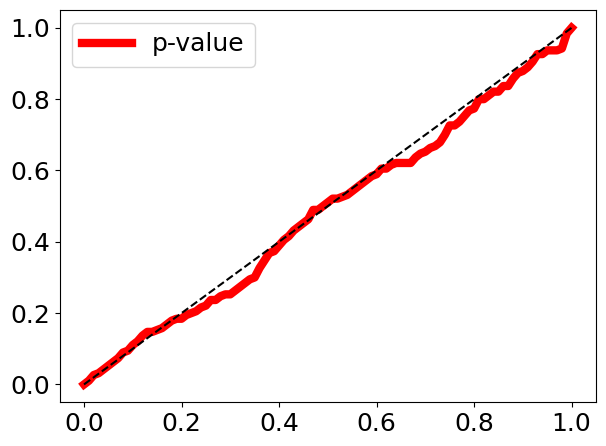

In [3]:
kstest = scipy.stats.kstest(list_p_value, 'uniform')
print(f"False positive rate: {FPR}")
print(f'Uniform check (KS-Test result): {kstest.pvalue}')

plt.rcParams.update({'font.size': 18})
grid = np.linspace(0, 1, 101)
plt.plot(grid, sm.distributions.ECDF(np.array(list_p_value))(grid), 'r-', linewidth=6, label='p-value')
plt.plot([0, 1], [0, 1], 'k--')
plt.legend()
plt.tight_layout()
plt.show()